# Import everything!

In [1]:
import torch
import torchvision


import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.animation as animation


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [ ]:
print(weights_data.shape)

## Print out what each model's *0* receptive field looks like

In [17]:
data = np.load('weights.npy') #numpy array of neural weights
weights_data = data
num_models = 4
for model_i in range(num_models):
    plt.imshow(weights_data[model_i,0,:,-1].reshape((28,28)))
    plt.show()

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

# Time for TCA
We will attempt to see learning for each neuron's receptive field through 1 epoch

In [3]:
import tensortools as tt

(4, 10, 784, 600)


Fitting rank-2 models:   0%|                                                                                                                                                                                            | 0/2 [00:00<?, ?it/s]/Users/ash/opt/miniconda3/envs/tca/lib/python3.7/site-packages/tensortools/optimize/ncp_hals.py:185: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  Cp = factors[:, idx] @ grams[idx][:, p]
/Users/ash/opt/miniconda3/envs/tca/lib/python3.7/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
                                                                                                                                                                                                                                              

Rank-2 models:  min obj, 0.39;  max obj, 0.39;  time to fit, 28.2s


Rank-3 models:  min obj, 0.37;  max obj, 0.37;  time to fit, 32.3s


Rank-4 models:  min obj, 0.35;  max obj, 0.35;  time to fit, 55.8s


Rank-5 models:  min obj, 0.33;  max obj, 0.33;  time to fit, 32.9s


Rank-6 models:  min obj, 0.32;  max obj, 0.32;  time to fit, 34.6s


Rank-7 models:  min obj, 0.31;  max obj, 0.31;  time to fit, 85.8s


Rank-8 models:  min obj, 0.29;  max obj, 0.29;  time to fit, 57.3s


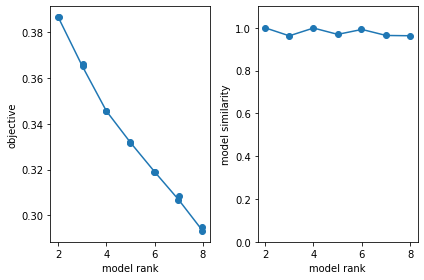

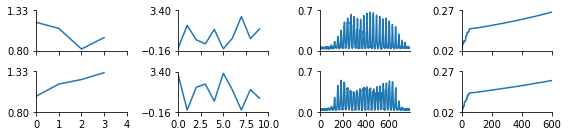

In [6]:

print(data.shape)

# Fit an ensemble of models
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(data, ranks=range(2, 9), replicates=2)

fig, axes = plt.subplots(1, 2)
tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
fig.tight_layout()

# Plot the low-d factors for an example model, e.g. rank-2, first optimization run / replicate.
num_components = 2
replicate = 0
tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

plt.show()

# Visualize 3 components

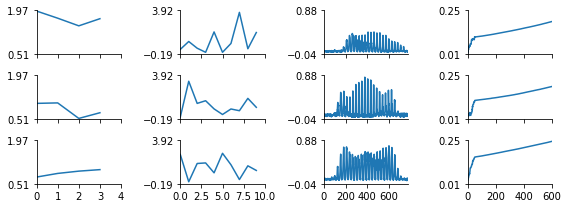

In [7]:
num_components = 3
replicate = 0
tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

plt.show()

# Visualize the weight factors

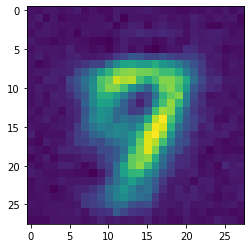

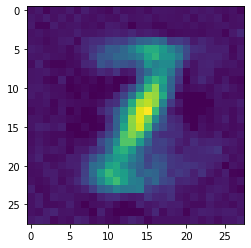

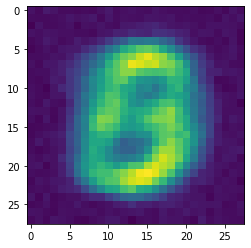

In [8]:

facts = ensemble.factors(num_components)[replicate]

for rep in ensemble.factors(num_components)[replicate][2].T:
    plt.imshow(rep.reshape(28,28))
    plt.show()

# Plot any factor as a bar chart:

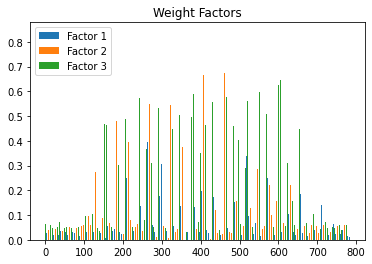

In [9]:
def bar_fact(fact,title=''):
    
    fig,ax = plt.subplots(1,1)#,figsize=(10,2))
    n_ind = np.arange(fact.shape[0])
    width = 0.2

    for lat_ind in range(fact.shape[1]):

        plt.bar(n_ind + lat_ind*width, fact[:,lat_ind],width,label="Comp:{}".format(lat_ind))
    # ax.set_xticks(np.arange(0,facts[0].shape[0]))
    plt.title(title)
    # ax.set_xlabel("Neuron #")
    plt.legend(['Factor 1','Factor 2','Factor 3'])
    
bar_fact(facts[2],'Weight Factors')

# Plot any factor as a line chart

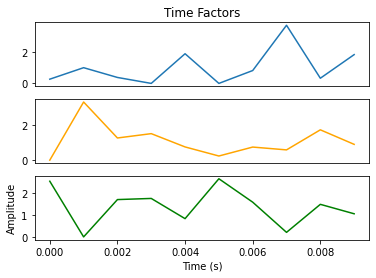

In [10]:
def line_fact(fact):

    ax = plt.subplot(3, 1, 1, title="Time Factors")
    ax.plot(fact[:,0])
    ax.set_xticks([])

    ax1 = plt.subplot(3, 1, 2, title="")
    ax1.plot(fact[:,1],c='orange')
    ax1.set_xticks([])

    ax2 = plt.subplot(3, 1, 3, title="")
    ax2.plot(np.arange(fact[:,2].shape[0])/1000,fact[:,2],c='green')

    ax2.set_xlabel
    # plt.legend(['F1','F2','F3'])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

line_fact(facts[1])

# line_fact(facts[3])


## Factors are stored in the ensemble list, as: (dim, reduced dim)

In [11]:

facts = ensemble.factors(3)[0]
print(facts[1].shape)


(10, 3)


# Reduce the dimension by the weight factor, factor 2

In [12]:
q = []
for i in range(data.shape[1]):
    q.append(np.stack([np.matmul(b.T, facts[2]).T for b in data[:,i,...]],axis=0))
q = np.array(q)
print(q.shape)

(10, 4, 3, 600)


# Plot in 2D for fun

In [18]:
%matplotlib inline
for i in range(num_models):
    plt.plot(c[i,0,:],c[i,1,:])
    plt.plot(d[i,0,:],d[i,1,:])

NameError: name 'c' is not defined

# Plot in 3D and see seperable trajectories

In [19]:
from mpl_toolkits.mplot3d import Axes3D
data.shape

(4, 10, 784, 600)

<IPython.core.display.Javascript object>


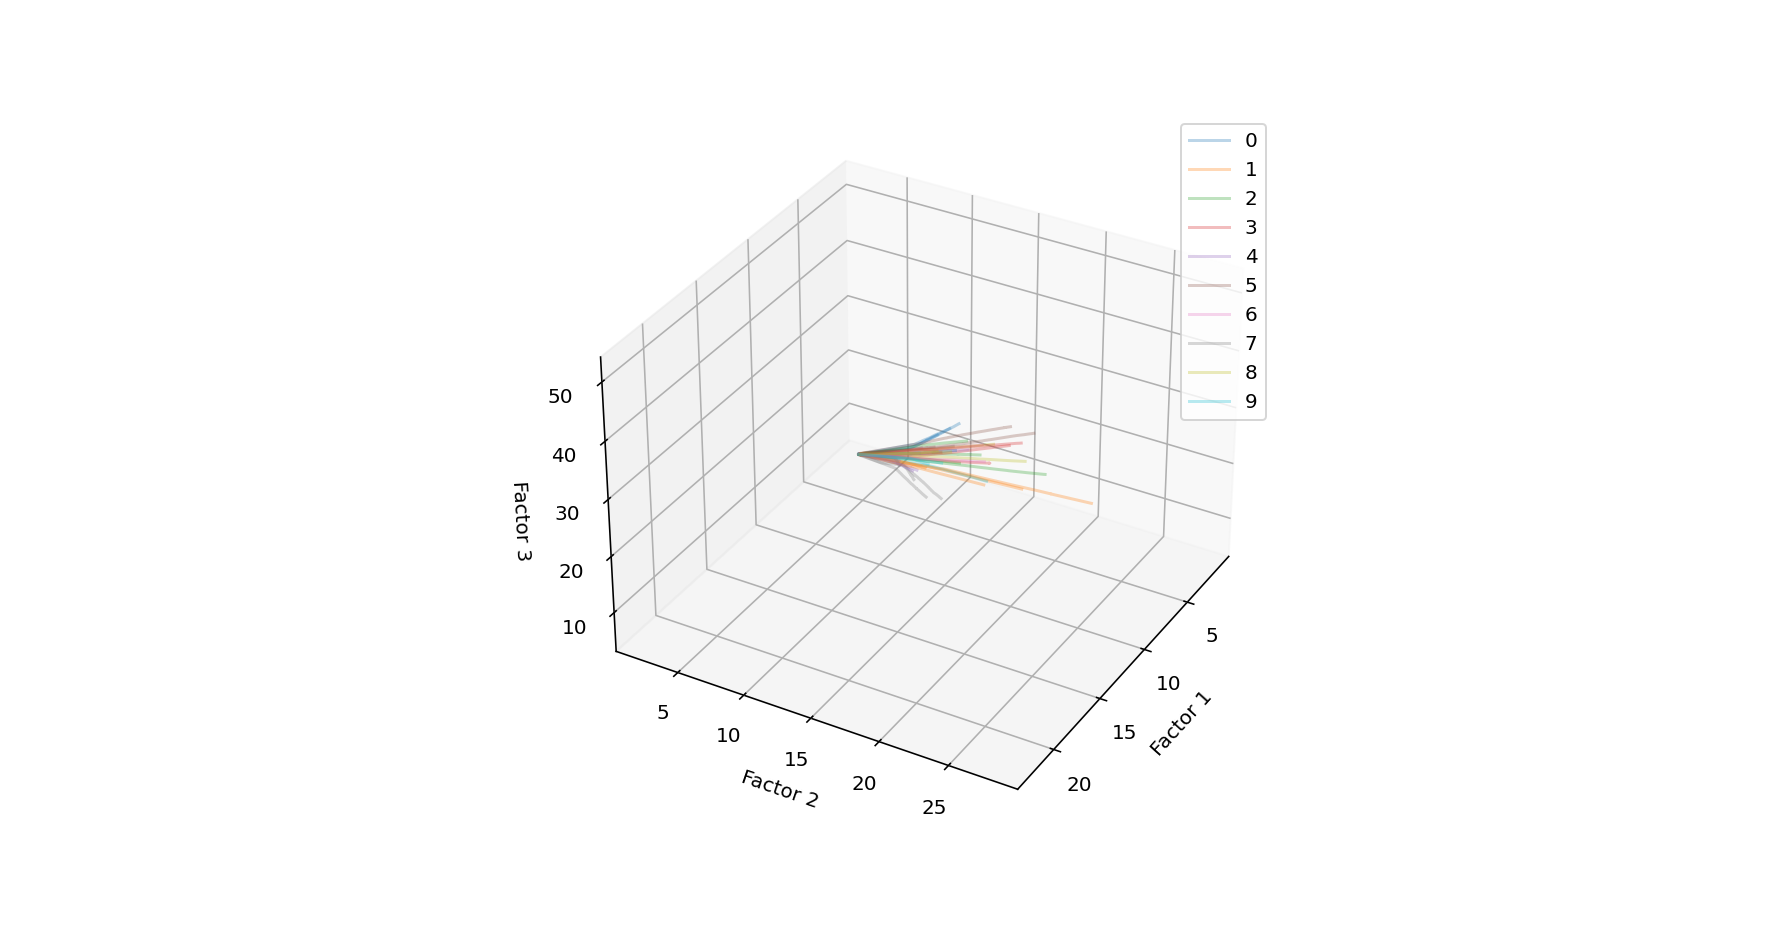

In [20]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_models):
    for j in range(10):
        plt.plot(q[j,i,0,:],q[j,i,1,:],q[j,i,2,:],alpha=.3)

plt.legend(['{}'.format(i) for i in range(10)])
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_zlabel('Factor 3')
plt.show()
#         plt.plot(d[i,0,:],d[i,1,:],d[i,2,:],'r',alpha=.3)

# Attempt to make animations